### Workbook by Misha Salkinder
### Home Credit Default Risk Kaggle Competition
### Exploratory Data Analysis

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
application_train = pd.read_csv('application_train_merged.csv', index_col=None, engine='python')

In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,...,Unknown type of loan,0,1,2,3,4,5,C,X,Month_Balance_Count
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,3.255682,2.045455,0.0,0.0,0.0,0.0,1.403409,1.295455,110.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [5]:
application_train.shape

(249507, 291)

In [6]:
application_train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,...,Unknown type of loan,0,1,2,3,4,5,C,X,Month_Balance_Count
count,249507.000000,249507.000000,249507,249507,249507,249507,249507.000000,2.495070e+05,2.495070e+05,249507.000000,...,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,226728,166572,163048,175912,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278157.032632,0.078427,NaN,NaN,NaN,NaN,0.428978,1.698831e+05,5.983590e+05,27080.198897,...,0.001836,0.887965,0.025688,0.001805,0.000619,0.000409,0.003529,0.703275,0.409197,56.962731
std,102855.926986,0.268842,NaN,NaN,NaN,NaN,0.730309,2.528324e+05,3.943241e+05,14034.558186,...,0.047424,1.800453,0.128290,0.020692,0.009672,0.007383,0.069757,1.684929,1.140007,122.421845
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.610000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189039.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16681.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278094.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,5.185620e+05,25033.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367299.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34634.250000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.567366,0.099269,55.000000


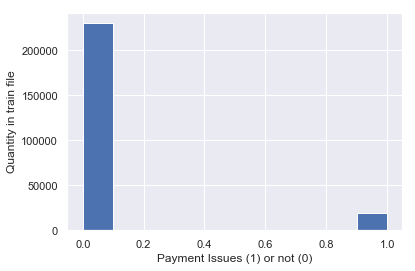

In [7]:
# Histogram of loan approvals vs denials 

plt.hist(application_train['TARGET'])
plt.xlabel('Payment Issues (1) or not (0)')
plt.ylabel('Quantity in train file')
plt.show()

In [8]:
print(application_train.TARGET.sum())
len(application_train)

19568


249507

### The ratio of the target data of payment issues to non payment issues can cause problems with the AUC calculations. I will downsample the no issue data before running models.

### Looking at a couple of variables to check whether the data is reasonable

In [9]:
# Age variable
(application_train['DAYS_BIRTH'] / -365).describe()

count    249507.000000
mean         44.140548
std          11.782056
min          20.517808
25%          34.457534
50%          43.301370
75%          53.964384
max          69.043836
Name: DAYS_BIRTH, dtype: float64

### The age variable looks to be populated with no unreasonable outliers

In [10]:
(application_train['DAYS_EMPLOYED'] / -365).describe()

count    249507.000000
mean       -173.680496
std         386.325549
min       -1000.665753
25%           0.865753
50%           3.520548
75%           7.839726
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

### Something doesn't look right in the time employed variable with a negative 1000 years as the minimum variable. the max seems resonable. 

In [11]:
print(np.sum(application_train['DAYS_EMPLOYED'] > 0))
print(np.sum(application_train['DAYS_EMPLOYED'] > 0)/len(application_train['DAYS_EMPLOYED'])*100, 'percent of the train data set has negative length of employment')

44687
17.910118754183248 percent of the train data set has negative length of employment


### It looks like some employment data is tagged with "365243", which is 18% of the downsampled data. Will need to make a decision on how to treat this data as the measures are not reasonable. I will consider the negative number a representation of unemployment or other such case and will mark them as the next best reasonable length of zero.

In [12]:
# Filling negative employment as zero (these are marked as positive days)

mask = application_train.DAYS_EMPLOYED > 0
column_name = 'DAYS_EMPLOYED'
application_train.loc[mask, column_name] = 0

In [13]:
(application_train['DAYS_EMPLOYED'] / -365).describe()
# std of 6.4 years makes much more sense

count    249507.000000
mean          5.539929
std           6.427587
min          -0.000000
25%           0.865753
50%           3.520548
75%           7.839726
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

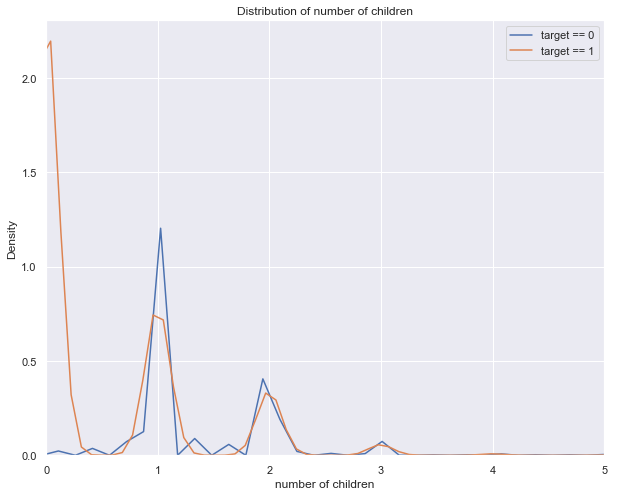

In [18]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'CNT_CHILDREN'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'CNT_CHILDREN'], label = 'target == 1')

plt.xlim(0, 5)

# Labeling of plot
plt.xlabel('number of children'); plt.ylabel('Density'); plt.title('Distribution of number of children');

Interesting to see that those who have had torubles repaying loans have mainly had zero children, although the distributions look to be similar for other children counts. Perhaps intriduce a flaged variable for no children?

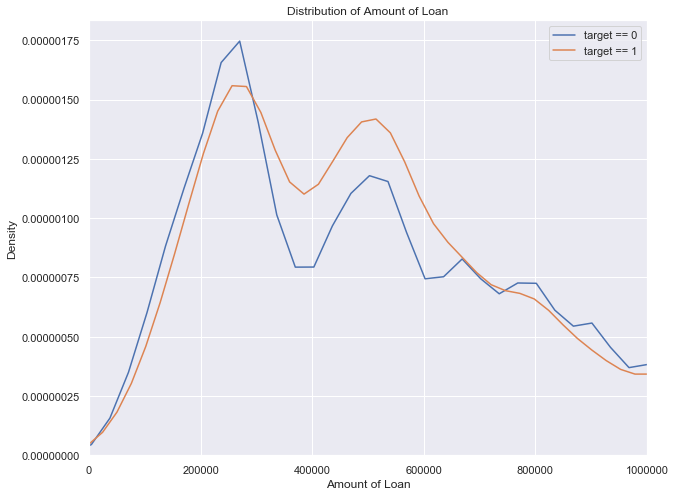

In [25]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'AMT_CREDIT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'AMT_CREDIT'], label = 'target == 1')

plt.xlim(0, 1000000)

# Labeling of plot
plt.xlabel('Amount of Loan'); plt.ylabel('Density'); plt.title('Distribution of Amount of Loan');


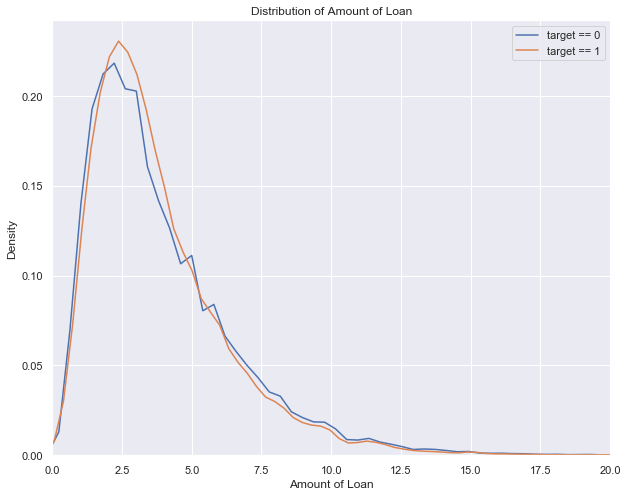

In [29]:
#New Variable for ration of loan to the income
#assumption here is that this ratio demonstrated the strain of the loan 
application_train['Loan_Income_Ratio'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']

plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'Loan_Income_Ratio'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'Loan_Income_Ratio'], label = 'target == 1')

plt.xlim(0, 20)

# Labeling of plot
plt.xlabel('Amount of Loan'); plt.ylabel('Density'); plt.title('Distribution of Loan Income Ratio');

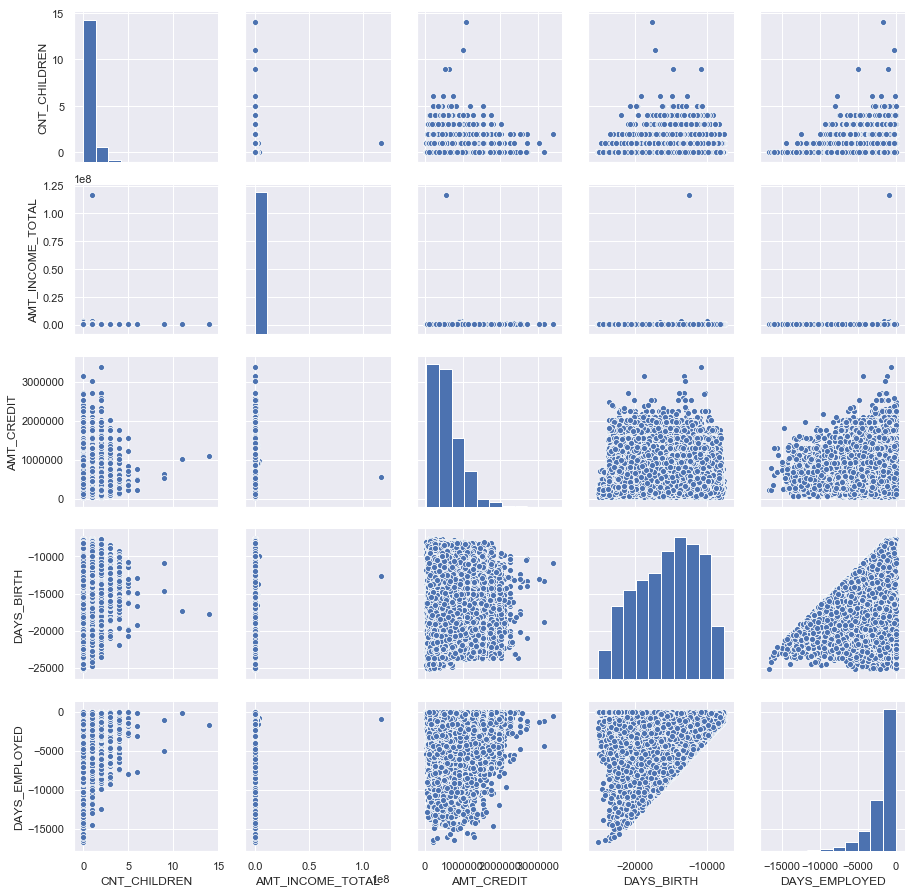

In [16]:
selected = application_train[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH',\
                            'DAYS_EMPLOYED', 'OCCUPATION_TYPE']]
sns.pairplot(selected)
plt.show()

count    3.956800e+04
mean     1.697734e+05
std      5.944947e+05
min      2.700000e+04
25%      1.125000e+05
50%      1.530000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


(array([3.790e+02, 7.540e+02, 2.812e+03, 4.278e+03, 5.300e+03, 5.609e+03,
        4.474e+03, 4.344e+03, 5.290e+02, 2.609e+03, 2.884e+03, 9.000e+02,
        1.469e+03, 5.580e+02, 7.970e+02, 5.500e+01, 2.890e+02, 4.930e+02,
        1.590e+02, 2.360e+02, 6.100e+01, 2.850e+02, 4.000e+00, 7.000e+00,
        3.100e+01, 1.000e+00, 8.500e+01, 6.000e+00, 2.600e+01, 0.000e+00,
        1.000e+00, 5.000e+00, 3.000e+00, 5.400e+01, 2.000e+00, 6.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 8.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+01, 0.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 27000.,  46260.,  65520.,  84780., 104040., 123300., 142560.,
        161820., 181080., 200340., 219600., 238860., 258120., 277380.,
        296640., 315900., 335160., 354420., 373680., 392940., 412200.,
        431460., 450720., 469980., 489240., 508500., 527760., 547020.,
        566280., 585540., 604800., 624060., 643320., 662580., 681840.,
        701100., 7203

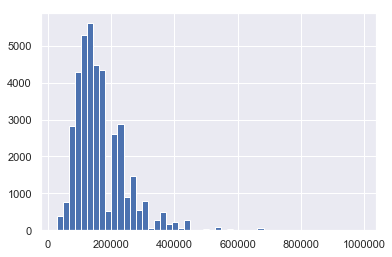

In [106]:
# Income seems to have some outliers - checking:
print (application_train['AMT_INCOME_TOTAL'].describe())

# Does a mean of $169,000 make sense for individual income?
new_income = np.array(application_train['AMT_INCOME_TOTAL'].tolist())
new_income = new_income[np.logical_and(new_income<1000000, new_income>0)]
plt.hist(new_income, bins = 50)

In [107]:
# Removing strong outlier in income
three_stds = np.mean(application_train['AMT_INCOME_TOTAL']) + 3*np.std(application_train['AMT_INCOME_TOTAL'])
application_train = application_train[application_train.AMT_INCOME_TOTAL < three_stds]

In [108]:
# Income seems to have some outliers - checking:
print (application_train['AMT_INCOME_TOTAL'].describe())

# note: would we want to cut it down even further or bin this variable?

count    3.956500e+04
mean     1.666585e+05
std      8.902902e+04
min      2.700000e+04
25%      1.125000e+05
50%      1.530000e+05
75%      2.025000e+05
max      1.890000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


In [109]:
application_train.shape

(39565, 291)

In [110]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_x_2,AMT_APPLICATION_x,AMT_CREDIT_x,AMT_DOWN_PAYMENT_x,AMT_GOODS_PRICE_x,HOUR_APPR_PROCESS_START_x,NFLAG_LAST_APPL_IN_DAY_x,RATE_DOWN_PAYMENT_x,RATE_INTEREST_PRIMARY_x,RATE_INTEREST_PRIVILEGED_x,DAYS_DECISION_x,SELLERPLACE_AREA_x,CNT_PAYMENT_x,DAYS_FIRST_DRAWING_x,DAYS_FIRST_DUE_x,DAYS_LAST_DUE_1ST_VERSION_x,DAYS_LAST_DUE_x,DAYS_TERMINATION_x,NFLAG_INSURED_ON_APPROVAL_x,Cash loans_x,Consumer loans_x,Revolving loans_x,XNA_x,FRIDAY_x,MONDAY_x,SATURDAY_x,SUNDAY_x,THURSDAY_x,TUESDAY_x,WEDNESDAY_x,Auto technology_x,Clothing_x,Connectivity_x,Construction_x,Consumer electronics_x,Furniture_x,Industry_x,Jewelry_x,MLM partners_x,Tourism_x,XNASeller_Ind_x,XNA_Name_Group_x,high_x,low_action_x,low_normal_x,middle_x,Card Street_x,Card X-Sell_x,Cash_x,Cash Street: high_x,Cash Street: low_x,Cash Street: middle_x,Cash X-Sell: high_x,Cash X-Sell: low_x,Cash X-Sell: middle_x,POS household with interest_x,POS household without interest_x,POS industry with interest_x,POS industry without interest_x,POS mobile with interest_x,POS mobile without interest_x,POS other with interest_x,POS others without interest_x,N_x,Y_x,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,late,AMT_ANNUITY_y_1,AMT_APPLICATION_y,AMT_CREDIT_y,AMT_DOWN_PAYMENT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY_y,RATE_DOWN_PAYMENT_y,RATE_INTEREST_PRIMARY_y,RATE_INTEREST_PRIVILEGED_y,DAYS_DECISION_y,SELLERPLACE_AREA_y,CNT_PAYMENT_y,DAYS_FIRST_DRAWING_y,DAYS_FIRST_DUE_y,DAYS_LAST_DUE_1ST_VERSION_y,DAYS_LAST_DUE_y,DAYS_TERMINATION_y,NFLAG_INSURED_ON_APPROVAL_y,Cash loans_y,Consumer loans_y,Revolving loans_y,XNA_y,FRIDAY_y,MONDAY_y,SATURDAY_y,SUNDAY_y,THURSDAY_y,TUESDAY_y,WEDNESDAY_y,Auto technology_y,Clothing_y,Connectivity_y,Construction_y,Consumer electronics_y,Furniture_y,Industry_y,Jewelry_y,MLM partners_y,Tourism_y,XNASeller_Ind_y,XNA_Name_Group_y,high_y,low_action_y,low_normal_y,middle_y,Card Street_y,Card X-Sell_y,Cash_y,Cash Street: high_y,Cash Street: low_y,Cash Street: middle_y,Cash X-Sell: high_y,Cash X-Sell: low_y,Cash X-Sell: middle_y,POS household with interest_y,POS household without interest_y,POS industry with interest_y,POS industry without interest_y,POS mobile with interest_y,POS mobile without interest_y,POS other with interest_y,POS others without interest_y,N_y,Y_y,Active_x,Amortized debt,Approved_x,Canceled,Completed_x,Demand_x,Returned to the store,Signed_x,XNA_Name_Status,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MI

In [111]:
# Finding categorical variables
cols = application_train.columns

num_cols = application_train._get_numeric_data().columns

list(set(cols) - set(num_cols))

['FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'ORGANIZATION_TYPE',
 'CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'OCCUPATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE']

In [112]:
# Transforming categorical variable into Dummies

application_train = application_train.join(pd.get_dummies(application_train.NAME_HOUSING_TYPE))\
.drop("NAME_HOUSING_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.NAME_FAMILY_STATUS))\
.drop("NAME_FAMILY_STATUS", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.WEEKDAY_APPR_PROCESS_START))\
.drop("WEEKDAY_APPR_PROCESS_START", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.FLAG_OWN_REALTY))\
.drop("FLAG_OWN_REALTY", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.OCCUPATION_TYPE))\
.drop("OCCUPATION_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.NAME_TYPE_SUITE))\
.drop("NAME_TYPE_SUITE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.CODE_GENDER))\
.drop("CODE_GENDER", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.NAME_INCOME_TYPE), lsuffix='_x')\
.drop("NAME_INCOME_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.NAME_EDUCATION_TYPE))\
.drop("NAME_EDUCATION_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.ORGANIZATION_TYPE), lsuffix='_x')\
.drop("ORGANIZATION_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.NAME_CONTRACT_TYPE))\
.drop("NAME_CONTRACT_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.FLAG_OWN_CAR), lsuffix='_x')\
.drop("FLAG_OWN_CAR", axis=1)

application_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_x_2,AMT_APPLICATION_x,AMT_CREDIT_x,AMT_DOWN_PAYMENT_x,AMT_GOODS_PRICE_x,HOUR_APPR_PROCESS_START_x,NFLAG_LAST_APPL_IN_DAY_x,RATE_DOWN_PAYMENT_x,RATE_INTEREST_PRIMARY_x,RATE_INTEREST_PRIVILEGED_x,DAYS_DECISION_x,SELLERPLACE_AREA_x,CNT_PAYMENT_x,DAYS_FIRST_DRAWING_x,DAYS_FIRST_DUE_x,DAYS_LAST_DUE_1ST_VERSION_x,DAYS_LAST_DUE_x,DAYS_TERMINATION_x,NFLAG_INSURED_ON_APPROVAL_x,Cash loans_x,Consumer loans_x,Revolving loans_x,XNA_x,FRIDAY_x,MONDAY_x,SATURDAY_x,SUNDAY_x,THURSDAY_x,TUESDAY_x,WEDNESDAY_x,Auto technology_x,Clothing_x,Connectivity_x,Construction_x,Consumer electronics_x,Furniture_x,Industry_x,Jewelry_x,MLM partners_x,Tourism_x,XNASeller_Ind_x,XNA_Name_Group_x,high_x,low_action_x,low_normal_x,middle_x,Card Street_x,Card X-Sell_x,Cash_x,Cash Street: high_x,Cash Street: low_x,Cash Street: middle_x,Cash X-Sell: high_x,Cash X-Sell: low_x,Cash X-Sell: middle_x,POS household with interest_x,POS household without interest_x,POS industry with interest_x,POS industry without interest_x,POS mobile with interest_x,POS mobile without interest_x,POS other with interest_x,POS others without interest_x,N_x,Y_x,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,late,AMT_ANNUITY_y_1,AMT_APPLICATION_y,AMT_CREDIT_y,AMT_DOWN_PAYMENT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY_y,RATE_DOWN_PAYMENT_y,RATE_INTEREST_PRIMARY_y,RATE_INTEREST_PRIVILEGED_y,DAYS_DECISION_y,SELLERPLACE_AREA_y,CNT_PAYMENT_y,DAYS_FIRST_DRAWING_y,DAYS_FIRST_DUE_y,DAYS_LAST_DUE_1ST_VERSION_y,DAYS_LAST_DUE_y,DAYS_TERMINATION_y,NFLAG_INSURED_ON_APPROVAL_y,Cash loans_y,Consumer loans_y,Revolving loans_y,XNA_y,FRIDAY_y,MONDAY_y,SATURDAY_y,SUNDAY_y,THURSDAY_y,TUESDAY_y,WEDNESDAY_y,Auto technology_y,Clothing_y,Connectivity_y,Construction_y,Consumer electronics_y,Furniture_y,Industry_y,Jewelry_y,MLM partners_y,Tourism_y,XNASeller_Ind_y,XNA_Name_Group_y,high_y,low_action_y,low_normal_y,middle_y,Card Street_y,Card X-Sell_y,Cash_y,Cash Street: high_y,Cash Street: low_y,Cash Street: middle_y,Cash X-Sell: high_y,Cash X-Sell: low_y,Cash X-Sell: middle_y,POS household with interest_y,POS household without interest_y,POS industry with interest_y,POS industry without interest_y,POS mobile with interest_y,POS mobile without interest_y,POS other with interest_y,POS others without interest_y,N_y,Y_y,Active_x,Amortized debt,Approved_x,Canceled,Completed_x,Demand_x,Returned to the store,Signed_x,XNA_Name_Status,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CU

In [113]:
pd.options.display.max_columns = None
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_x_2,AMT_APPLICATION_x,AMT_CREDIT_x,AMT_DOWN_PAYMENT_x,AMT_GOODS_PRICE_x,HOUR_APPR_PROCESS_START_x,NFLAG_LAST_APPL_IN_DAY_x,RATE_DOWN_PAYMENT_x,RATE_INTEREST_PRIMARY_x,RATE_INTEREST_PRIVILEGED_x,DAYS_DECISION_x,SELLERPLACE_AREA_x,CNT_PAYMENT_x,DAYS_FIRST_DRAWING_x,DAYS_FIRST_DUE_x,DAYS_LAST_DUE_1ST_VERSION_x,DAYS_LAST_DUE_x,DAYS_TERMINATION_x,NFLAG_INSURED_ON_APPROVAL_x,Cash loans_x,Consumer loans_x,Revolving loans_x,XNA_x,FRIDAY_x,MONDAY_x,SATURDAY_x,SUNDAY_x,THURSDAY_x,TUESDAY_x,WEDNESDAY_x,Auto technology_x,Clothing_x,Connectivity_x,Construction_x,Consumer electronics_x,Furniture_x,Industry_x,Jewelry_x,MLM partners_x,Tourism_x,XNASeller_Ind_x,XNA_Name_Group_x,high_x,low_action_x,low_normal_x,middle_x,Card Street_x,Card X-Sell_x,Cash_x,Cash Street: high_x,Cash Street: low_x,Cash Street: middle_x,Cash X-Sell: high_x,Cash X-Sell: low_x,Cash X-Sell: middle_x,POS household with interest_x,POS household without interest_x,POS industry with interest_x,POS industry without interest_x,POS mobile with interest_x,POS mobile without interest_x,POS other with interest_x,POS others without interest_x,N_x,Y_x,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,late,AMT_ANNUITY_y_1,AMT_APPLICATION_y,AMT_CREDIT_y,AMT_DOWN_PAYMENT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY_y,RATE_DOWN_PAYMENT_y,RATE_INTEREST_PRIMARY_y,RATE_INTEREST_PRIVILEGED_y,DAYS_DECISION_y,SELLERPLACE_AREA_y,CNT_PAYMENT_y,DAYS_FIRST_DRAWING_y,DAYS_FIRST_DUE_y,DAYS_LAST_DUE_1ST_VERSION_y,DAYS_LAST_DUE_y,DAYS_TERMINATION_y,NFLAG_INSURED_ON_APPROVAL_y,Cash loans_y,Consumer loans_y,Revolving loans_y,XNA_y,FRIDAY_y,MONDAY_y,SATURDAY_y,SUNDAY_y,THURSDAY_y,TUESDAY_y,WEDNESDAY_y,Auto technology_y,Clothing_y,Connectivity_y,Construction_y,Consumer electronics_y,Furniture_y,Industry_y,Jewelry_y,MLM partners_y,Tourism_y,XNASeller_Ind_y,XNA_Name_Group_y,high_y,low_action_y,low_normal_y,middle_y,Card Street_y,Card X-Sell_y,Cash_y,Cash Street: high_y,Cash Street: low_y,Cash Street: middle_y,Cash X-Sell: high_y,Cash X-Sell: low_y,Cash X-Sell: middle_y,POS household with interest_y,POS household without interest_y,POS industry with interest_y,POS industry without interest_y,POS mobile with interest_y,POS mobile without interest_y,POS other with interest_y,POS others without interest_y,N_y,Y_y,Active_x,Amortized debt,Approved_x,Canceled,Completed_x,Demand_x,Returned to the store,Signed_x,XNA_Name_Status,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CU

In [114]:
# Dropping a few duplicate columns
application_train = application_train.loc[:,~application_train.columns.duplicated()]
application_train.shape

(39565, 397)

In [99]:
#undersampling as our current ration of 1 to 0 is only 9%. 
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = application_train[application_train.TARGET==0]
df_minority = application_train[application_train.TARGET==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=20000,     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.TARGET.value_counts()

0    20000
1    19568
Name: TARGET, dtype: int64

In [100]:
application_train = df_downsampled

In [224]:
X = application_train
X = application_train.drop(['TARGET', 'SK_ID_CURR'], axis=1) #Dependent Variable
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_x_2,AMT_APPLICATION_x,AMT_CREDIT_x,AMT_DOWN_PAYMENT_x,AMT_GOODS_PRICE_x,HOUR_APPR_PROCESS_START_x,NFLAG_LAST_APPL_IN_DAY_x,RATE_DOWN_PAYMENT_x,RATE_INTEREST_PRIMARY_x,RATE_INTEREST_PRIVILEGED_x,DAYS_DECISION_x,SELLERPLACE_AREA_x,CNT_PAYMENT_x,DAYS_FIRST_DRAWING_x,DAYS_FIRST_DUE_x,DAYS_LAST_DUE_1ST_VERSION_x,DAYS_LAST_DUE_x,DAYS_TERMINATION_x,NFLAG_INSURED_ON_APPROVAL_x,Cash loans_x,Consumer loans_x,Revolving loans_x,XNA_x,FRIDAY_x,MONDAY_x,SATURDAY_x,SUNDAY_x,THURSDAY_x,TUESDAY_x,WEDNESDAY_x,Auto technology_x,Clothing_x,Connectivity_x,Construction_x,Consumer electronics_x,Furniture_x,Industry_x,Jewelry_x,MLM partners_x,Tourism_x,XNASeller_Ind_x,XNA_Name_Group_x,high_x,low_action_x,low_normal_x,middle_x,Card Street_x,Card X-Sell_x,Cash_x,Cash Street: high_x,Cash Street: low_x,Cash Street: middle_x,Cash X-Sell: high_x,Cash X-Sell: low_x,Cash X-Sell: middle_x,POS household with interest_x,POS household without interest_x,POS industry with interest_x,POS industry without interest_x,POS mobile with interest_x,POS mobile without interest_x,POS other with interest_x,POS others without interest_x,N_x,Y_x,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,late,AMT_ANNUITY_y_1,AMT_APPLICATION_y,AMT_CREDIT_y,AMT_DOWN_PAYMENT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY_y,RATE_DOWN_PAYMENT_y,RATE_INTEREST_PRIMARY_y,RATE_INTEREST_PRIVILEGED_y,DAYS_DECISION_y,SELLERPLACE_AREA_y,CNT_PAYMENT_y,DAYS_FIRST_DRAWING_y,DAYS_FIRST_DUE_y,DAYS_LAST_DUE_1ST_VERSION_y,DAYS_LAST_DUE_y,DAYS_TERMINATION_y,NFLAG_INSURED_ON_APPROVAL_y,Cash loans_y,Consumer loans_y,Revolving loans_y,XNA_y,FRIDAY_y,MONDAY_y,SATURDAY_y,SUNDAY_y,THURSDAY_y,TUESDAY_y,WEDNESDAY_y,Auto technology_y,Clothing_y,Connectivity_y,Construction_y,Consumer electronics_y,Furniture_y,Industry_y,Jewelry_y,MLM partners_y,Tourism_y,XNASeller_Ind_y,XNA_Name_Group_y,high_y,low_action_y,low_normal_y,middle_y,Card Street_y,Card X-Sell_y,Cash_y,Cash Street: high_y,Cash Street: low_y,Cash Street: middle_y,Cash X-Sell: high_y,Cash X-Sell: low_y,Cash X-Sell: middle_y,POS household with interest_y,POS household without interest_y,POS industry with interest_y,POS industry without interest_y,POS mobile with interest_y,POS mobile without interest_y,POS other with interest_y,POS others without interest_y,N_y,Y_y,Active_x,Amortized debt,Approved_x,Canceled,Completed_x,Demand_x,Returned to the store,Signed_x,XNA_Name_Status,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALME

In [225]:
y = application_train.TARGET #Target variable
y.head()

123774    0
72807     0
195157    0
66820     0
95391     0
Name: TARGET, dtype: int64

In [226]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [121]:
final_iv, IV = data_vars(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning:

In [122]:
features = IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'].tolist()
X2 = X_train[features]

In [123]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
  count = 0
  while max_vif > vif_threshold:
    count += 1
    print("Iteration # "+str(count))
    vif = pd.DataFrame()
    vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    if vif['VIFactor'].max().round(1) > vif_threshold:
      print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max().round(1)))
      df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
      max_vif = vif['VIFactor'].max().round(1)
    else:
        print('Complete')
        return df, vif.sort_values('VIFactor').round(1)
X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1


/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing AMT_DOWN_PAYMENT_x with VIF of inf
Iteration # 2
Removing Card Street_x with VIF of inf
Iteration # 3
Removing Cash X-Sell: high_x with VIF of inf
Iteration # 4
Removing Cash loans with VIF of inf
Iteration # 5
Removing DAYS_FIRST_DRAWING_x with VIF of inf
Iteration # 6
Removing DAYS_FIRST_DUE_x with VIF of inf
Iteration # 7
Removing DAYS_LAST_DUE_1ST_VERSION_x with VIF of inf
Iteration # 8
Removing Pensioner with VIF of inf
Iteration # 9
Removing RATE_DOWN_PAYMENT_x with VIF of inf
Iteration # 10
Removing Revolving loans_x with VIF of inf
Iteration # 11
Removing SELLERPLACE_AREA_x with VIF of inf
Iteration # 12
Removing XNA_Name_Group_x with VIF of inf
Iteration # 13
Removing high_x with VIF of inf
Iteration # 14
Removing AMT_RECIVABLE with VIF of 1462149.200000
Iteration # 15
Removing AMT_TOTAL_RECEIVABLE with VIF of 54619.500000
Iteration # 16
Removing F with VIF of 17637.200000
Iteration # 17
Removing DAYS_ENTRY_PAYMENT with VIF of 17156.300000
Iteration # 18
Removing AMT_

In [124]:
X_train=final_df

In [125]:
X_train.describe()

,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DOWN_PAYMENT_y,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_GOODS_PRICE,AMT_PAYMENT,AMT_RECEIVABLE_PRINCIPAL,Business Entity Type 3,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,Card Street_y,Cash X-Sell: high_y,Credit card,DAYS_CREDIT_ENDDATE,DAYS_CREDIT_UPDATE,DAYS_EMPLOYED,DAYS_FIRST_DUE_y,DAYS_ID_PUBLISH,DAYS_LAST_DUE_1ST_VERSION_y,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,Drivers,FLAG_DOCUMENT_6,FLAG_WORK_PHONE,Higher education,LIVE_CITY_NOT_WORK_CITY,Laborers,M,Microloan,NUM_INSTALMENT_VERSION,RATE_DOWN_PAYMENT_y,REG_CITY_NOT_LIVE_CITY,Revolving loans,SELLERPLACE_AREA_y,Self-employed,Unemployed,With parents,Working,XNA,XNA_Name_Group_y,high_y,late
count,2.769500e+04,2.769500e+04,2.769500e+04,2.769500e+04,2.769500e+04,2.769500e+04,2.769500e+04,2.769500e+04,2.769500e+04,2.769500e+04,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,2.769500e+04,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000,27695.000000
mean,7.816657e+03,6.499272e+05,2.166016e+04,7.376767e+02,1.378728e+04,5.642820e+04,2.454808e+04,5.171880e+05,6.379516e+05,5.935479e+05,0.234086,2.904604,5.608413,129.027875,0.383932,0.212060,1.399783,3580.784293,-3125.721899,-1847.199242,3.570504e+04,-2917.014587,102160.826647,-944.652789,-4775.337462,0.069868,0.071962,0.218595,0.206283,0.193934,0.201805,0.366528,0.062755,31.990648,0.173620,0.093627,0.079220,1433.196967,0.135692,0.288536,0.057447,0.560715,0.153530,1.641163,1.152880,3.534284
std,1.043114e+05,1.411324e+06,8.849933e+04,2.737607e+04,4.145025e+04,1.797546e+05,1.334070e+05,3.369483e+05,8.702488e+05,1.872146e+06,0.423434,9.245002,27.168674,531.245583,0.850504,0.656271,1.605328,13601.101425,3772.915329,2144.330184,1.160299e+05,1498.637297,165746.990670,796.986805,3437.705966,0.254929,0.258430,0.413301,0.404643,0.395385,0.401355,0.481865,0.747759,34.157717,0.228155,0.291314,0.270087,4772.357127,0.342468,0.453090,0.232699,0.496309,0.360504,2.315901,1.465532,6.305163
min,0.000000e+00,-3.873105e+05,-3.915666e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+04,0.000000e+00,-1.260000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-126651.000000,-58308.000000,-16651.000000,-2.569900e+04,-6226.000000,-19904.000000,-3960.000000,-19706.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.430000e+05,1.177635e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2402.000000,-4429.000000,-2573.500000,-3.753500e+03,-4231.000000,-1750.000000,-1537.000000,-7126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,2.105370e+05,0.000000e+00,0.000000e+00,5.125500e+03,0.000000e+00,0.000000e+00,4.500000e+05,2.908118e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-58.000000,-1916.000000,-1172.000000,-1.749000e+03,-3097.000000,-252.000000,-745.000000,-4313.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.104280,0.000000,0.000000,248.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,3.047535e+03,7.171905e+05,0.000000e+00,0.000000e+00,1.584675e+04,0.000000e+00,0.000000e+00,6.750000e+05,7.812646e+05,0.000000e+

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def run_regression_accuracy(X_train, y_train, X_test, y_test):
  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
  cm = confusion_matrix(y_test, y_pred)
  print('\nConfusion matrix: \n',cm)

  print('\nClassification report: \n',classification_report(y_test, y_pred))

  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

  plt.figure()
  plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  
  return logreg

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.57

Confusion matrix: 
 [[4661 1305]
 [3823 2081]]

Classification report: 
               precision    recall  f1-score   support

           0       0.55      0.78      0.65      5966
           1       0.61      0.35      0.45      5904

   micro avg       0.57      0.57      0.57     11870
   macro avg       0.58      0.57      0.55     11870
weighted avg       0.58      0.57      0.55     11870



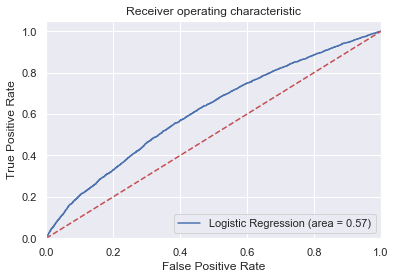

In [129]:
logreg = run_regression_accuracy(X_train, y_train, X_test, y_test)

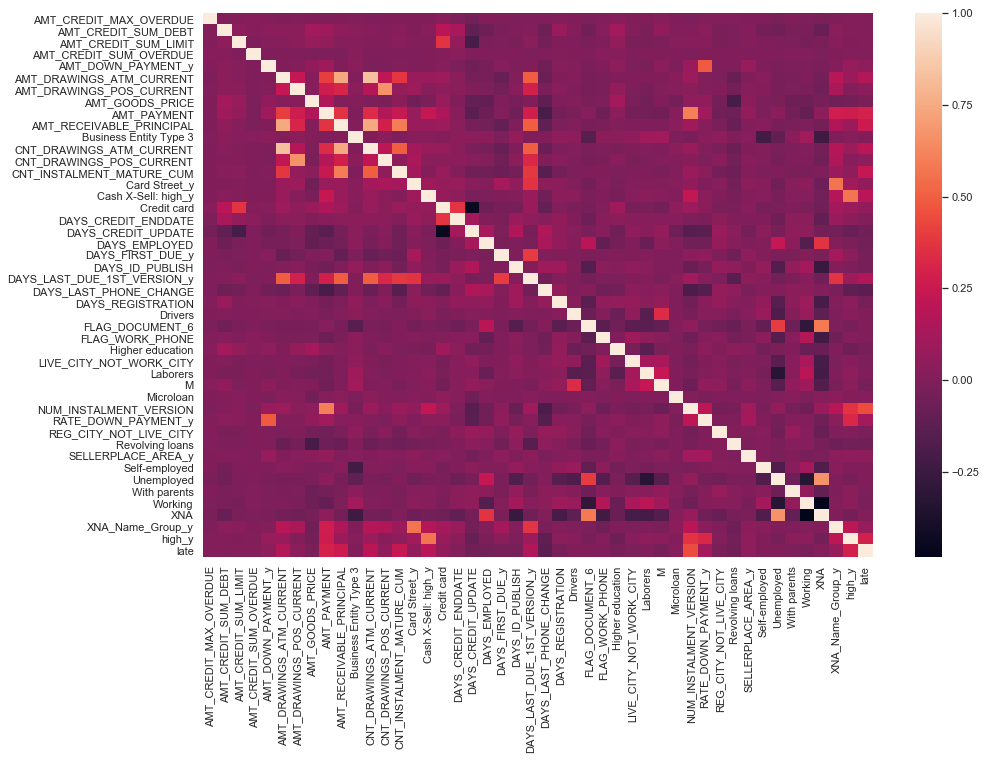

In [130]:
plt.figure(figsize=(15,10))
corr = X_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [131]:
# Did we remove some important variables?
# Perhaps we should introduce some of the strongly correlated features back into the model?

# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 Active                                          0.109867
REGION_RATING_CLIENT_W_CITY                     0.111133
DAYS_BIRTH                                      0.146616
TARGET                                          1.000000
FLAG_MOBIL                                           NaN
FLAG_DOCUMENT_2                                      NaN
FLAG_DOCUMENT_12                                     NaN
Amortized debt                                       NaN
Canceled                                             NaN
XNA_Name_Status                                      NaN
Approved_y                                           NaN
Demand_y                                             NaN
Interbank credit                                     NaN
Loan for purchase of shares (margin lending)         NaN
Mobile operator loan                                 NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.296778
EXT_SOURCE_2      

In [132]:
# Age information into a separate dataframe
age_data = application_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
123774,0,-17843,48.884932,"(45.0, 50.0]"
72807,0,-16834,46.120548,"(45.0, 50.0]"
195157,0,-18594,50.942466,"(50.0, 55.0]"
66820,0,-17556,48.098630,"(45.0, 50.0]"
95391,0,-16993,46.556164,"(45.0, 50.0]"
174469,0,-23910,65.506849,"(65.0, 70.0]"
22093,0,-12230,33.506849,"(30.0, 35.0]"
29688,0,-21283,58.309589,"(55.0, 60.0]"
177023,0,-20553,56.309589,"(55.0, 60.0]"
234697,0,-17640,48.328767,"(45.0, 50.0]"


In [133]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.609698,-8532.243643,23.376010
"(25.0, 30.0]",0.586373,-10170.872117,27.865403
"(30.0, 35.0]",0.556739,-11847.433659,32.458722
"(35.0, 40.0]",0.530344,-13699.757923,37.533583
"(40.0, 45.0]",0.488265,-15490.692109,42.440252
"(45.0, 50.0]",0.475006,-17318.945528,47.449166
"(50.0, 55.0]",0.447223,-19182.204857,52.553986
"(55.0, 60.0]",0.389582,-20977.688009,57.473118
"(60.0, 65.0]",0.377606,-22784.443174,62.423132


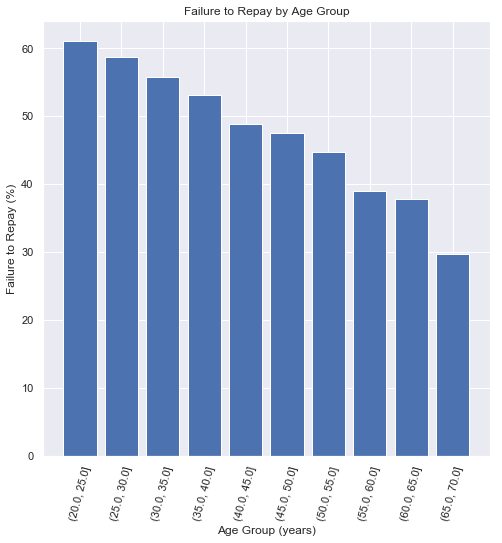

In [134]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [227]:
from sklearn.metrics import roc_auc_score

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier


# Instantiate model with 250 decision trees
rf = RandomForestClassifier(n_estimators = 250, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

X_test = X_test[X_train.columns.tolist()] # Added to refelct the column count

y_pred2 = rf.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.6880698790435776

In [228]:
from sklearn.metrics import confusion_matrix

conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[4260, 1706],
       [1995, 3909]])

In [135]:
# Re-running previous models with the inclusion of Age of appiicant and Ext Sources

features = final_df.columns.values.tolist()
features.extend(['DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])
application_train_shortened = application_train[features]
application_train_shortened.head()

,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DOWN_PAYMENT_y,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_GOODS_PRICE,AMT_PAYMENT,AMT_RECEIVABLE_PRINCIPAL,Business Entity Type 3,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,Card Street_y,Cash X-Sell: high_y,Credit card,DAYS_CREDIT_ENDDATE,DAYS_CREDIT_UPDATE,DAYS_EMPLOYED,DAYS_FIRST_DUE_y,DAYS_ID_PUBLISH,DAYS_LAST_DUE_1ST_VERSION_y,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,Drivers,FLAG_DOCUMENT_6,FLAG_WORK_PHONE,Higher education,LIVE_CITY_NOT_WORK_CITY,Laborers,M,Microloan,NUM_INSTALMENT_VERSION,RATE_DOWN_PAYMENT_y,REG_CITY_NOT_LIVE_CITY,Revolving loans,SELLERPLACE_AREA_y,Self-employed,Unemployed,With parents,Working,XNA,XNA_Name_Group_y,high_y,late,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
123774,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1350000.0,178284.465,0.000,0,0.0,0.0,0.0,0.0,0.0,0.0,-3961.0,-4135.0,-2939,-3376.0,-1377,-3136.0,-661.0,-842.0,0,0,1,0,0,0,0,0.0,10.0,0.000000,1,0,963.0,0,0,0,1,0,0.0,1.0,0.0,-17843,0.50213,0.565806,0.644679
72807,6930.99,324612.0,8188.92,0.0,0.0,0.0,0.0,157500.0,77893.560,0.000,0,0.0,0.0,0.0,0.0,0.0,1.0,-2288.0,-2927.0,-8093,-442.0,-376,-112.0,-473.0,-1357.0,0,0,1,0,0,0,0,0.0,11.0,0.000000,0,0,5.0,0,0,0,1,0,0.0,0.0,0.0,-16834,0.71917,0.541840,0.472253
195157,71738.64,2021886.0,0.00,0.0,35055.0,681750.0,44500.5,1125000.0,1148430.195,1666368.765,1,10.0,1.0,135.0,0.0,0.0,2.0,6455.0,-4945.0,-521,-1936.0,-2124,364188.0,-1236.0,-5914.0,0,0,0,1,0,0,0,0.0,6.0,0.105282,0,0,214.0,0,0,0,0,0,1.0,0.0,0.0,-18594,0.50213,0.560194,0.172495
66820,0.00,3513298.5,0.00,0.0,7200.0,134775.0,0.0,900000.0,835815.510,3817889.190,0,4.0,0.0,3468.0,2.0,0.0,1.0,6227.0,-541.0,-10197,-5417.0,-1103,363680.0,-1899.0,-8890.0,0,0,0,0,0,0,1,0.0,23.0,0.100060,0,0,391.0,0,1,0,1,0,2.0,0.0,9.0,-17556,0.50213,0.723991,0.772631
95391,0.00,4.5,0.00,0.0,9000.0,0.0,0.0,135000.0,341908.380,0.000,0,0.0,0.0,0.0,0.0,0.0,2.0,30936.0,-810.0,-201,-2084.0,-541,-1004.0,-1639.0,-996.0,0,0,0,0,0,0,0,0.0,24.0,0.195756,0,1,88.0,0,0,0,1,0,1.0,1.0,1.0,-16993,0.80076,0.710340,0.549597


In [136]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(application_train_shortened, y, test_size=0.3, random_state=42)

In [229]:
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.6894451348972088

In [230]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[4237, 1729],
       [1956, 3948]])

In [231]:
from sklearn.metrics import roc_curve, auc

n_estimators = [4, 8, 16, 32, 64, 100, 200, 500, 1000]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, color='blue', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, color='red', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

KeyboardInterrupt: 

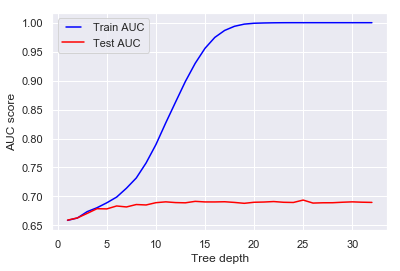

In [51]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_estimators=250, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, color='blue', label='Train AUC')
line2, = plt.plot(max_depths, test_results, color='red', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [233]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, max_depth=25, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.6914714945213483

In [234]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[4244, 1722],
       [1939, 3965]])

In [140]:
# Re-running previous models with the inclusion of additional important variables that were cut out by VIF

features.extend(['Closed', 'DAYS_INSTALMENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'F'])
application_train_shortened2 = application_train[features]
application_train_shortened2.head()

,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DOWN_PAYMENT_y,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_GOODS_PRICE,AMT_PAYMENT,AMT_RECEIVABLE_PRINCIPAL,Business Entity Type 3,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,Card Street_y,Cash X-Sell: high_y,Credit card,DAYS_CREDIT_ENDDATE,DAYS_CREDIT_UPDATE,DAYS_EMPLOYED,DAYS_FIRST_DUE_y,DAYS_ID_PUBLISH,DAYS_LAST_DUE_1ST_VERSION_y,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,Drivers,FLAG_DOCUMENT_6,FLAG_WORK_PHONE,Higher education,LIVE_CITY_NOT_WORK_CITY,Laborers,M,Microloan,NUM_INSTALMENT_VERSION,RATE_DOWN_PAYMENT_y,REG_CITY_NOT_LIVE_CITY,Revolving loans,SELLERPLACE_AREA_y,Self-employed,Unemployed,With parents,Working,XNA,XNA_Name_Group_y,high_y,late,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,Closed,DAYS_INSTALMENT,AMT_PAYMENT_TOTAL_CURRENT,F
123774,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1350000.0,178284.465,0.000,0,0.0,0.0,0.0,0.0,0.0,0.0,-3961.0,-4135.0,-2939,-3376.0,-1377,-3136.0,-661.0,-842.0,0,0,1,0,0,0,0,0.0,10.0,0.000000,1,0,963.0,0,0,0,1,0,0.0,1.0,0.0,-17843,0.50213,0.565806,0.644679,3.0,-14134.0,0.000,1
72807,6930.99,324612.0,8188.92,0.0,0.0,0.0,0.0,157500.0,77893.560,0.000,0,0.0,0.0,0.0,0.0,0.0,1.0,-2288.0,-2927.0,-8093,-442.0,-376,-112.0,-473.0,-1357.0,0,0,1,0,0,0,0,0.0,11.0,0.000000,0,0,5.0,0,0,0,1,0,0.0,0.0,0.0,-16834,0.71917,0.541840,0.472253,2.0,-3070.0,0.000,1
195157,71738.64,2021886.0,0.00,0.0,35055.0,681750.0,44500.5,1125000.0,1148430.195,1666368.765,1,10.0,1.0,135.0,0.0,0.0,2.0,6455.0,-4945.0,-521,-1936.0,-2124,364188.0,-1236.0,-5914.0,0,0,0,1,0,0,0,0.0,6.0,0.105282,0,0,214.0,0,0,0,0,0,1.0,0.0,0.0,-18594,0.50213,0.560194,0.172495,3.0,-21643.0,735642.495,1
66820,0.00,3513298.5,0.00,0.0,7200.0,134775.0,0.0,900000.0,835815.510,3817889.190,0,4.0,0.0,3468.0,2.0,0.0,1.0,6227.0,-541.0,-10197,-5417.0,-1103,363680.0,-1899.0,-8890.0,0,0,0,0,0,0,1,0.0,23.0,0.100060,0,0,391.0,0,1,0,1,0,2.0,0.0,9.0,-17556,0.50213,0.723991,0.772631,1.0,-167640.0,330750.000,0
95391,0.00,4.5,0.00,0.0,9000.0,0.0,0.0,135000.0,341908.380,0.000,0,0.0,0.0,0.0,0.0,0.0,2.0,30936.0,-810.0,-201,-2084.0,-541,-1004.0,-1639.0,-996.0,0,0,0,0,0,0,0,0.0,24.0,0.195756,0,1,88.0,0,0,0,1,0,1.0,1.0,1.0,-16993,0.80076,0.710340,0.549597,2.0,-23111.0,0.000,1


In [141]:
X_train, X_test, y_train, y_test = train_test_split(application_train_shortened2, y, test_size=0.3, random_state=42)

# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 1000, max_depth=25, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

X_test = X_test[X_train.columns.tolist()] # Added to refelct the column count

y_pred2 = rf.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.6972877073515957

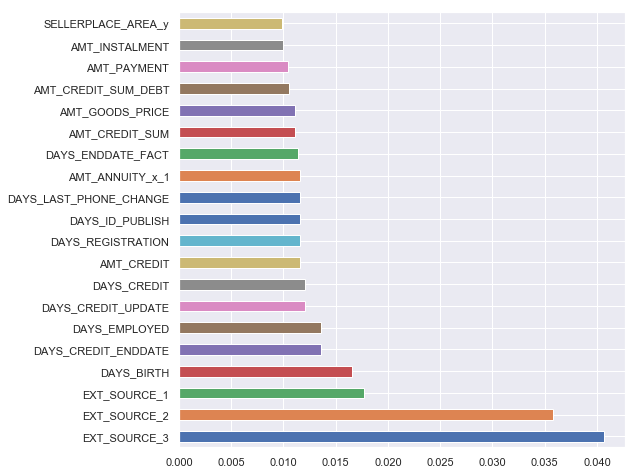

In [236]:
plt.figure(figsize = (8, 8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [237]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 500)

xg_reg.fit(X_train,y_train)

y_pred2 = xg_reg.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.7025913895997827

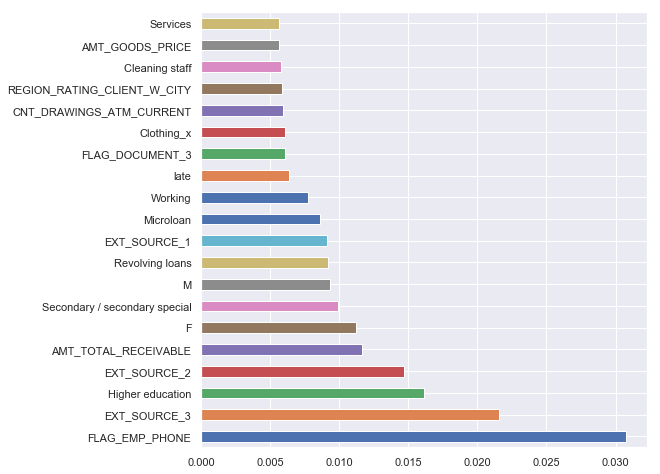

In [239]:
plt.figure(figsize = (8, 8))
feat_importances = pd.Series(xg_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [241]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]
param_test1 = {'n_estimators':range(20,251,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 160}, 0.765725178157849)

In [242]:
xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 160)

xg_reg.fit(X_train,y_train)

y_pred2 = xg_reg.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.7034277118667935

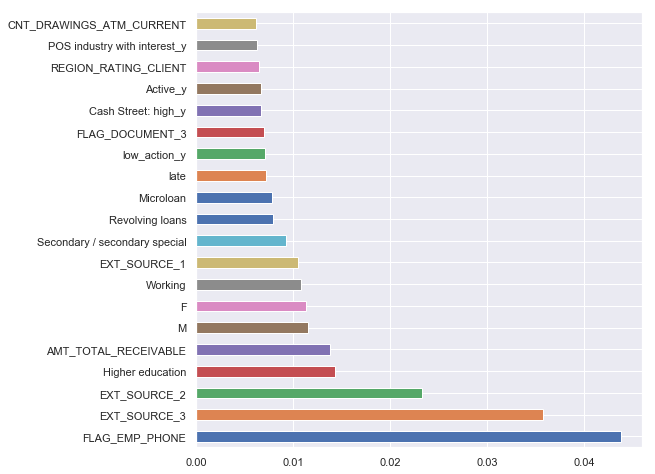

In [244]:
plt.figure(figsize = (8, 8))
feat_importances = pd.Series(xg_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [245]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=160, max_features='sqrt', random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2, gsearch2.best_params_, gsearch2.best_score_

(GridSearchCV(cv=5, error_score='raise-deprecating',
        estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features='sqrt', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_sam...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'max_depth': range(5, 16, 2), 'min_samples_split': range(200, 1001, 200)},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='roc_auc', verbose=0),
 {'max_depth': 5, 'min_samples_split': 600},
 0.7667233787380843)

In [247]:
xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 130, min_samples_split = 600)

xg_reg.fit(X_train,y_train)

y_pred2 = xg_reg.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.7035953283602564

In [208]:
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, \
                                                               n_estimators=130,max_depth=7,max_features='sqrt', \
                                                               subsample=0.8, random_state=10, min_samples_split = 600), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 60}, 0.766980539490251)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(application_train_shortened2, y, test_size=0.3, random_state=42)

xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 130, min_samples_split = 600, min_samples_leaf= 60)

xg_reg.fit(X_train,y_train)

y_pred2 = xg_reg.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.6952534268260886

In [210]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, \
                                                               n_estimators=130,max_depth=7,max_features='sqrt', \
                                                               subsample=0.8, min_samples_split = 600, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 17}, 0.7665703479074151)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(application_train_shortened2, y, test_size=0.3, random_state=42)

xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1, max_features = 17, 
                max_depth = 7, alpha = 10, n_estimators = 130, min_samples_split = 600, min_samples_leaf= 60)

xg_reg.fit(X_train,y_train)

y_pred2 = xg_reg.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.6952534268260886

In [251]:
xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, subsample=0.5, learning_rate = 0.1, max_features = 17, 
                max_depth = 5, alpha = 10, gamma=0.1, n_estimators = 160, min_samples_split = 600, min_samples_leaf= 60)

xg_reg.fit(X_train,y_train)

y_pred2 = xg_reg.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.7041219405447491

In [223]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,11)],
 'colsample_bytree':[i/10.0 for i in range(6,11)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.05, max_features = 17, 
                max_depth = 7, alpha = 10, gamma=0.1, n_estimators = 130, min_samples_split = 600, min_samples_leaf= 6,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.best_params_, gsearch4.best_score_

KeyboardInterrupt: 

In [ ]:
# No need for VIF for non linear models
# Test through Cross-Validation for over-fitting.

In [ ]:
# One-Hot Encoding - Run for the dataFrame Dummies)

# Information Value Analysis - Weight of evidence (scored based on predictive power)
# Select variables between .1 and .7 for the next stage of the analysis

# Correlation plot

# VIF -> Collinearity

# ML

In [ ]:
### data wrangling - combining files into one single file (one line of information per each user)
### Bring multiple rows of information into a single row of information. Transpose into columns or GROUPBY.

### Merge data-sets into a single file on the user level

### Then we are looking at missing values:
### if 30% - 40% of data missing in column - get rid of column
### if 10-20% missing - replace variables with something (deriving from other variables OR replace with majority)

### Then we are looking for outliers: (outlier treatment)
### Getting rid of outlier values if we believe that this is a data issue - wrongly entered or otherwise
### e.g. if we see height of 9ft we will replace it with the next heighest reasonable value.

### Feature Engineering:
### Creating new variables from past variables


In [106]:
# We can see some outliers, like those on the Income. Will only keet data that is within 2.5 standard distributions from the mean
from scipy import stats
application_train = application_train[(np.abs(stats.zscore(application_train)) < 2.5).all(axis=1)]

TypeError: unsupported operand type(s) for /: 'str' and 'int'